#Libraries

In [84]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import numpy as np

#Load and Show Dataset

In [89]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

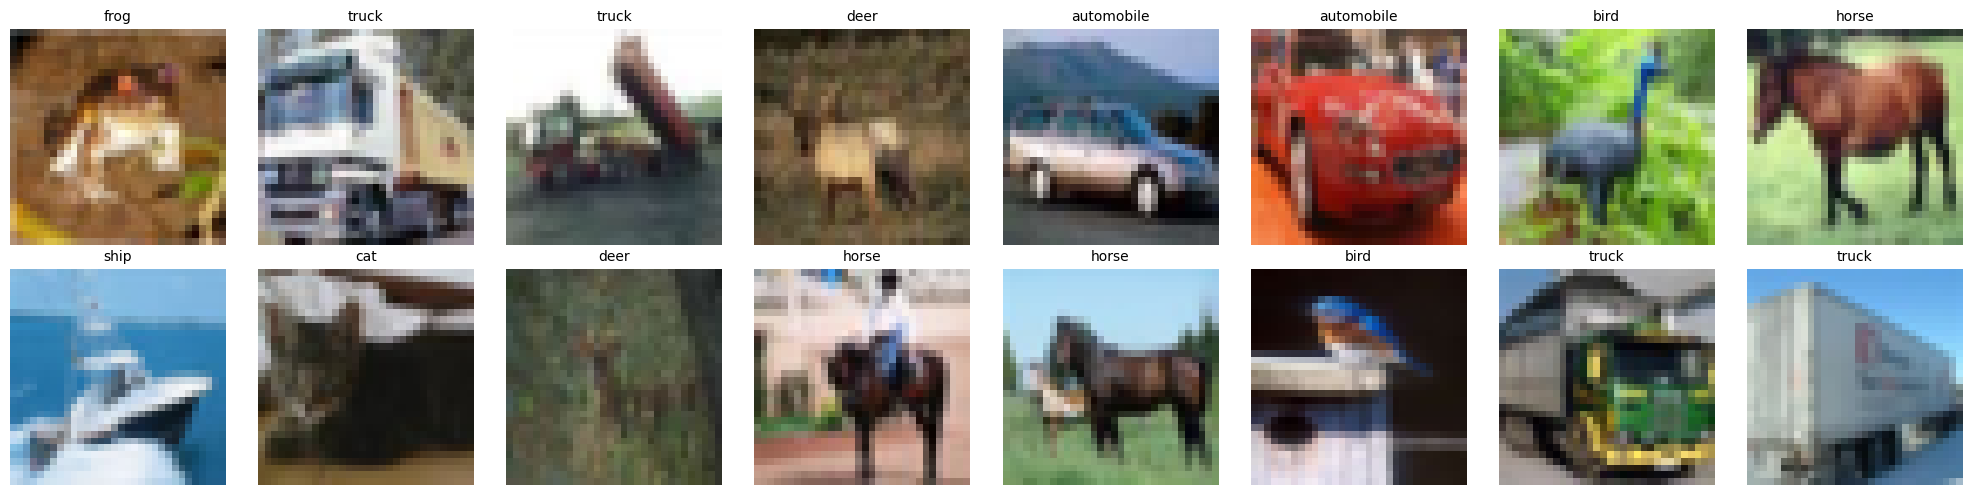

In [92]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20, 5))
for i in range(16):
    plt.subplot(2, 8, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"{class_names[(y_train[i][0])]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


#Define Model

In [93]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [66]:
def define_model(shape, num_layers,num_neurons):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=shape))
    model.add(keras.layers.Flatten())
    for l in range(num_layers):
        model.add(keras.layers.Dense(units=num_neurons, activation='relu'))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(rate=0.3))
    model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

    return model

In [73]:
num_layers = 20
num_neurons = 512


model = define_model(x_train[0].shape, num_layers,num_neurons)


optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(x_train, y_train,
                    batch_size=2000,
                    epochs=300,
                    validation_data=(x_test, y_test),
                    shuffle=True,
                    callbacks=[model_checkpoint])


Epoch 1/300
25/25 [==============================] - ETA: 0s - loss: 2.9523 - accuracy: 0.0993

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 16s 98ms/step - loss: 2.9523 - accuracy: 0.0993 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 2/300
25/25 [==============================] - 1s 49ms/step - loss: 2.7491 - accuracy: 0.1029 - val_loss: 2.3121 - val_accuracy: 0.1000
Epoch 3/300
25/25 [==============================] - 1s 52ms/step - loss: 2.6603 - accuracy: 0.1048 - val_loss: 2.3185 - val_accuracy: 0.1000
Epoch 4/300
25/25 [==============================] - 1s 49ms/step - loss: 2.5967 - accuracy: 0.1068 - val_loss: 2.3260 - val_accuracy: 0.1001
Epoch 5/300
25/25 [==============================] - 1s 49ms/step - loss: 2.5527 - accuracy: 0.1073 - val_loss: 2.3345 - val_accuracy: 0.0903
Epoch 6/300
25/25 [==============================] - 1s 49ms/step - loss: 2.5209 - accuracy: 0.1053 - val_loss: 2.3442 - val_accuracy: 0.0884
Epoch 7/300
25/25 [==============================] - 1s 49ms/step - loss: 2.4942 - accuracy: 0.1087 - val_loss: 2.3510 - val_accuracy: 0.0964
Epoch 8/300
25/25

#Plot the Results

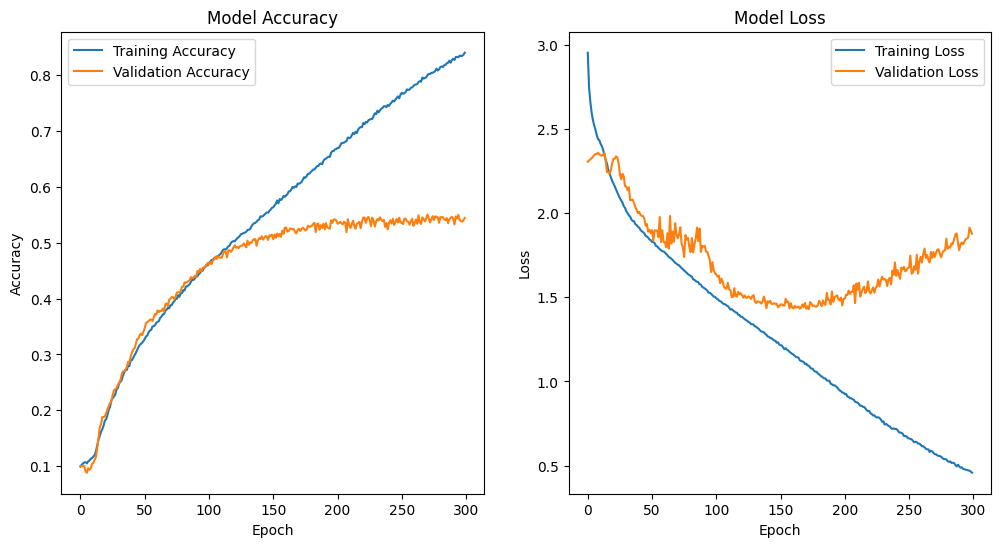

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()



In [81]:
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

best_val_loss_idx = val_loss.index(min(val_loss))
best_val_accuracy_idx = val_accuracy.index(max(val_accuracy))

best_val_loss = val_loss[best_val_loss_idx]
best_val_accuracy = val_accuracy[best_val_accuracy_idx] * 100

print(f"Best validation loss: {best_val_loss:.2f} at epoch {best_val_loss_idx + 1}")
print(f"Best validation accuracy: {best_val_accuracy:.2f}% at epoch {best_val_accuracy_idx + 1}")


Best validation loss: 1.43 at epoch 173
Best validation accuracy: 55.02% at epoch 271


#Show Some Predicted Pictures

313/313 [==============================] - 1s 4ms/step


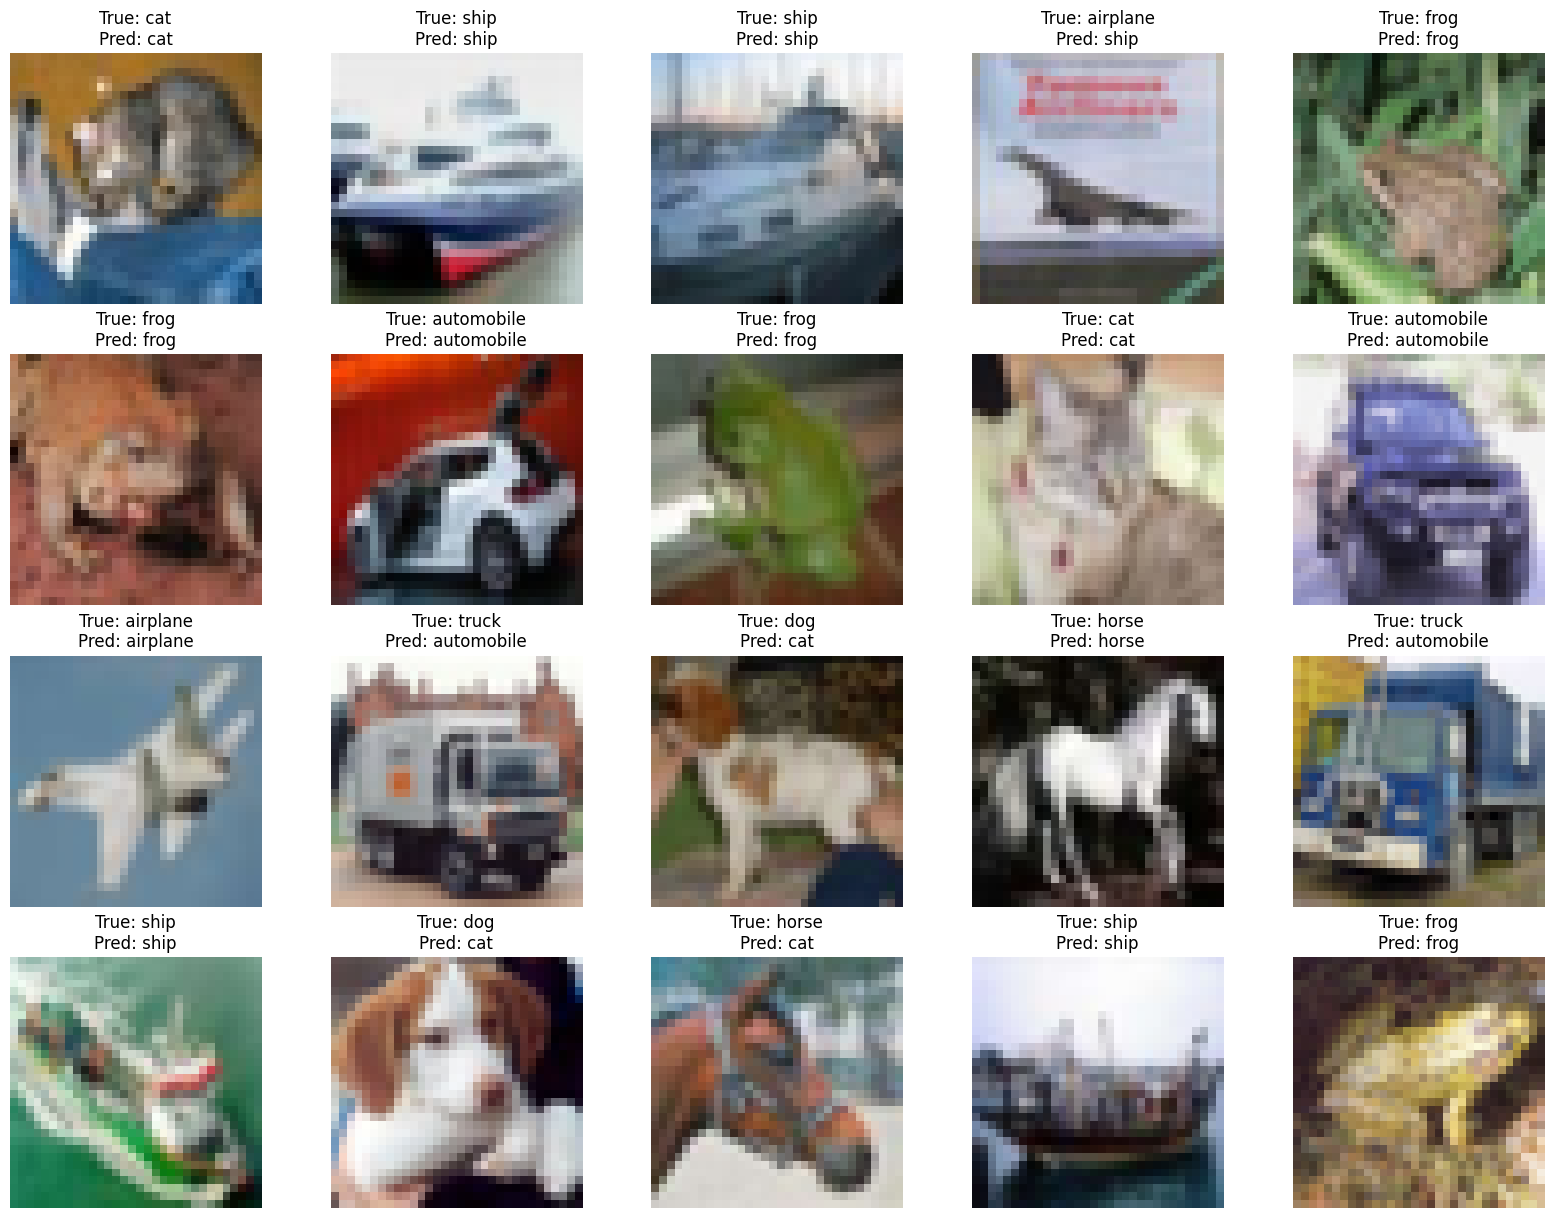

In [94]:
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20, 15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_true_classes[i]]}\nPred: {class_names[y_pred_classes[i]]}")
    plt.axis('off')

plt.show()